In [10]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [11]:
# load file 
df = pd.read_csv('canada_capita.csv')

# rename columns 
df.rename(columns={'year':'year', 'per capita income (US$)':'PCI'}, inplace=True)

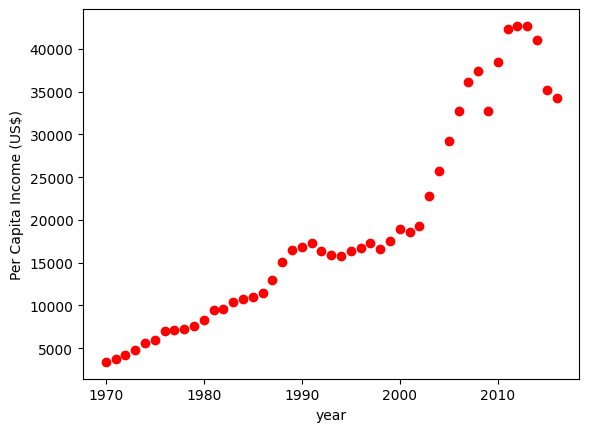

In [12]:
# create a plot of the data points
%matplotlib inline
plt.xlabel('year')
plt.ylabel('Per Capita Income (US$)')
plt.scatter(df['year'], df['PCI'], color='red')

In [13]:
# load the Linear Regression Model 
model = linear_model.LinearRegression()

# Fit the data into Model
model.fit(df[['year']], df[['PCI']])

# predict
model.predict([[2017]])

/home/fahad/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[38803.29886875]])

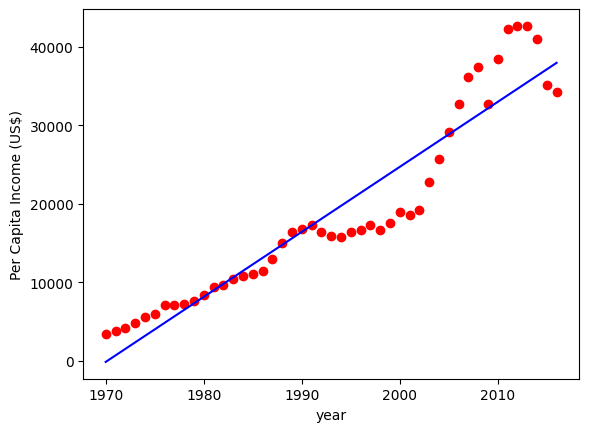

In [14]:
# plot the regression line 

plt.xlabel('year')
plt.ylabel('Per Capita Income (US$)')
plt.scatter(df['year'], df['PCI'], color='red')
plt.plot(df['year'], model.predict(df[['year']]), color='blue')

### We can do Reshape to make it 2D array 

In [15]:
x = df["year"].values.reshape(-1,1)
y = df["PCI"].values.reshape(-1,1)

### Or we can just use df[['column_name']] to make it 2D array

In [16]:
# model accuracy 
# model.score(x,y)
model.score(df[['year']],df['PCI'])

0.890916917957032

## Let's save the model in a file and load it again

#### Method 1: Using pickle

In [24]:
import pickle

# write the model to a file
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)
    
# now read the model to predict further
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)
    
# now let's check the model data
print("m: ", mp.coef_)
print("b: ", mp.intercept_)
print("Predict: ",mp.predict([[2017]]))

m:  [[828.46507522]]
b:  [-1632210.75785546]
Predict:  [[38803.29886875]]


/home/fahad/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Method 2: Using joblib

In [30]:
import joblib

# write the model to a file 
joblib.dump(model, 'model_joblib')

# read the joblib file
mj = joblib.load('model_joblib')

# let's check the model
print("m: ", mj.coef_)
print("b: ", mj.intercept_)
print("Predict: ",mj.predict([[2017]]))


m:  [[828.46507522]]
b:  [-1632210.75785546]
Predict:  [[38803.29886875]]


/home/fahad/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **In this way We can save our Model and load them while necessary without training them before every prediction**